# Quantum Algorithm - Bernstein-Vazirani

In [5]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import Aer
from qiskit import QuantumCircuit,assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

## Classical Solution

We first demonstrate the classical solution which requires as many iterations as the number of bits

In [29]:
n = 3
s = [0,1,1]

Below we create a classical Oracle. The oracle is supposed to be instantaneous and we treat it like a black box  

In [32]:
def classical_oracle(x,s):
    tot = 0
    for i,j in enumerate(x):
        tot += j*s[i]
    return tot%2

# The oracle takes in x and s and returns x.s % 2
classical_oracle([0,0,0],[0,0,1])

0

 Now we use the oracle and probe each bit by using a one-hot vector to find all the elements of s


In [33]:
x=[0 for i in range(len(s))]
decoded = [0 for i in range(len(s))]
for i in range(len(s)):
    # Generate the on-hot vector
    x[i]=1
    #Apply oracle to find the ith decoded string
    decoded[i] = classical_oracle(x,s)
    # Set x-vector to original all 0 state
    x[i]=0

# Print out decoded s
print(s)

[0, 1, 1]


## Quantum Solution

In [10]:
n = 3
s = '111'   # the hidden binary string

In [11]:
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(4, 3)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

bv_circuit.barrier()

# Apply Hadamard gates before querying the oracle
bv_circuit.h(0)
bv_circuit.h(1)
bv_circuit.h(2)

bv_circuit.barrier()

# Apply the inner-product oracle
# s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        

bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)



# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

░ ┌───┐ ░                 ░ ┌───┐┌─┐      
q_0: ───────────░─┤ H ├─░───■─────────────░─┤ H ├┤M├──────
                ░ ├───┤ ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ───────────░─┤ H ├─░───┼────■────────░─┤ H ├─╫─┤M├───
                ░ ├───┤ ░   │    │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ───────────░─┤ H ├─░───┼────┼────■───░─┤ H ├─╫──╫─┤M├
     ┌───┐┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░───────░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

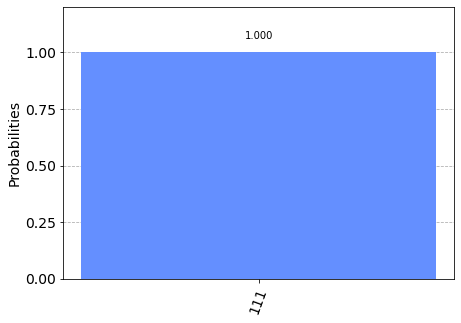

In [12]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 500
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)